# Mini Project 3

**2025 Introduction to Quantiative Methods in Finance**

**The Erdös Institute**

The code below provides a visual representation of how the Black-Scholes **call option** price changes with respect to time.

**a)** Use the visualization to interpret how the *rate of change* of the Black-Scholes call option price behaves as time progresses.

**b)** Create a separate graphic to visualize how the *rate of change* of the Black-Scholes call option price depends on the spot price $S(0)$.

**c)** Repeat parts **a** and **b** for **put option** prices.

**d)** Use the space below to record your observations and reflections based on the generated plots.

---

### Observations:

- *Call Option – Time Sensitivity: As time increases, the call option price also increases but the rate of change is decreasing w.r.t time. The benefit of additional time diminishes as expiration moves further away.*
- *Call Option – Spot Price Sensitivity: As the spot price increases, the call option price also increases and the rate of change is increasing w.r.t the spot price. When the spot price crosses the strike price (e.g., near S0 = 110), the option price increases more rapidly*  
- *Put Option – Time Sensitivity: As the time increases, the put option price also increases and the rate of change is decreasing w.r.t time. The curve flattens with longer durations — again showing that more time adds less and less additional value.*  
- *Put Option – Spot Price Sensitivity: As the spot price increases, the put option price decreases and the rate of change is increasing w.r.t the spot price. For spot prices well below the strike, the option price is close to K − S0.*  

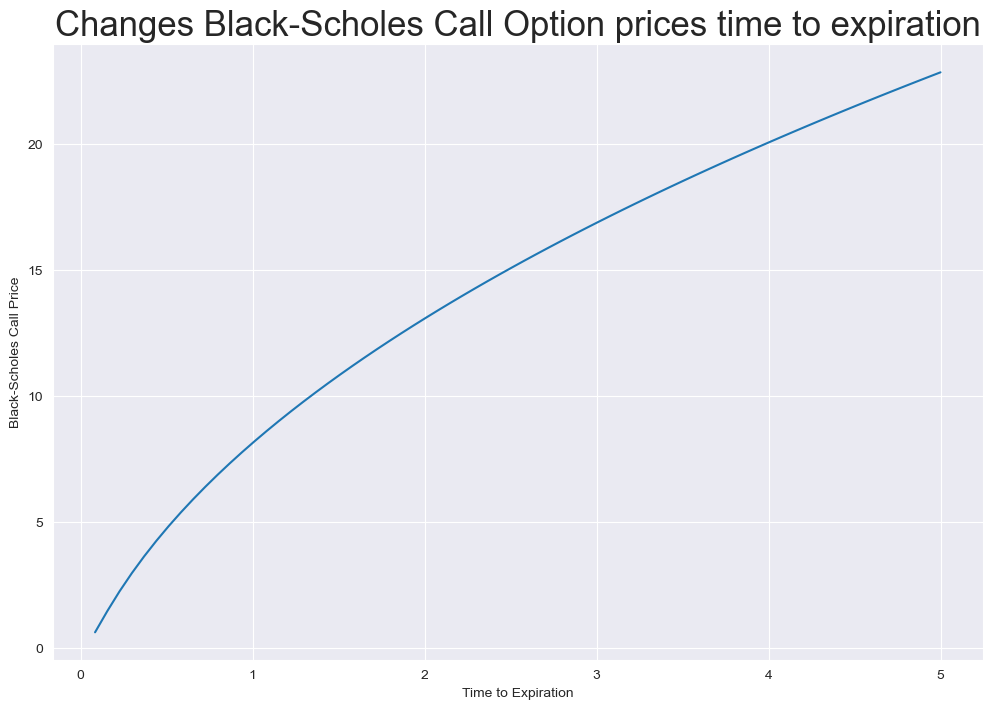

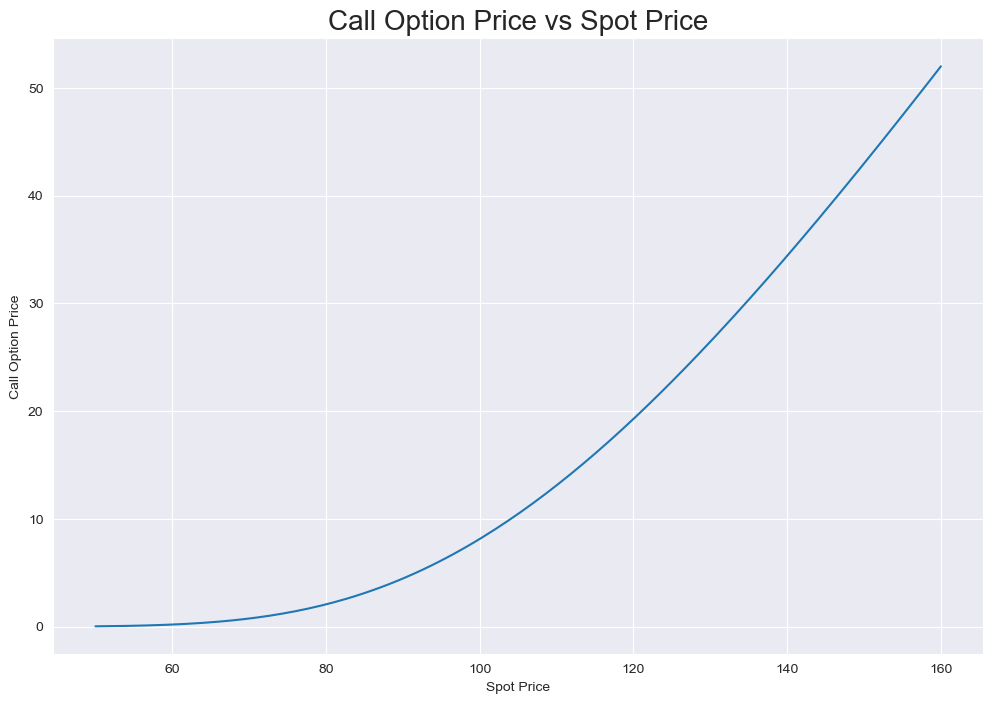

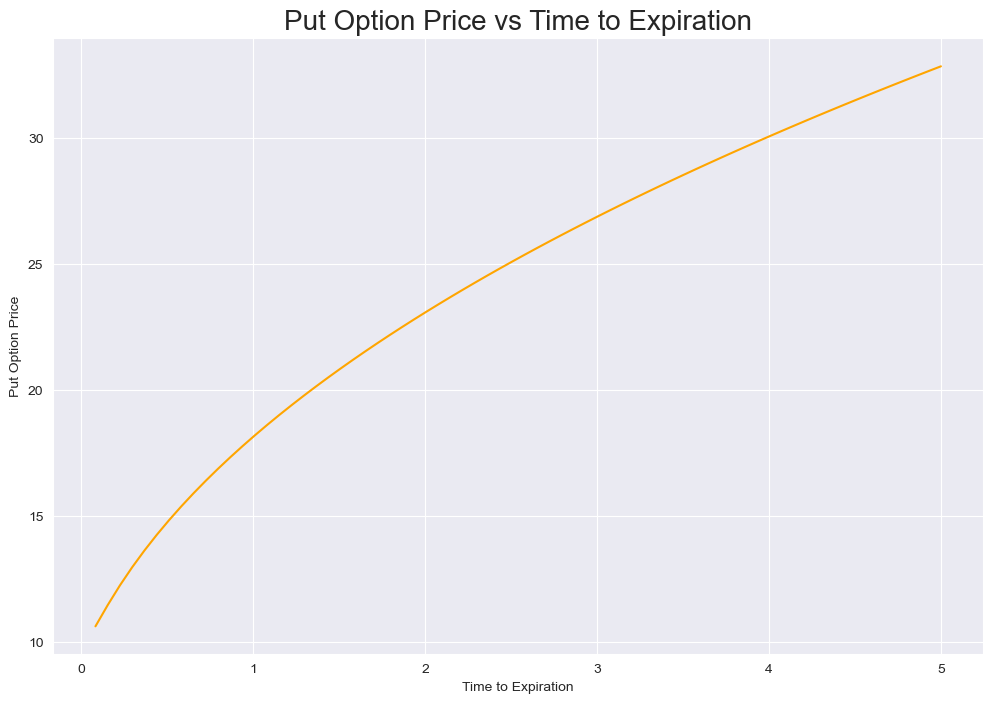

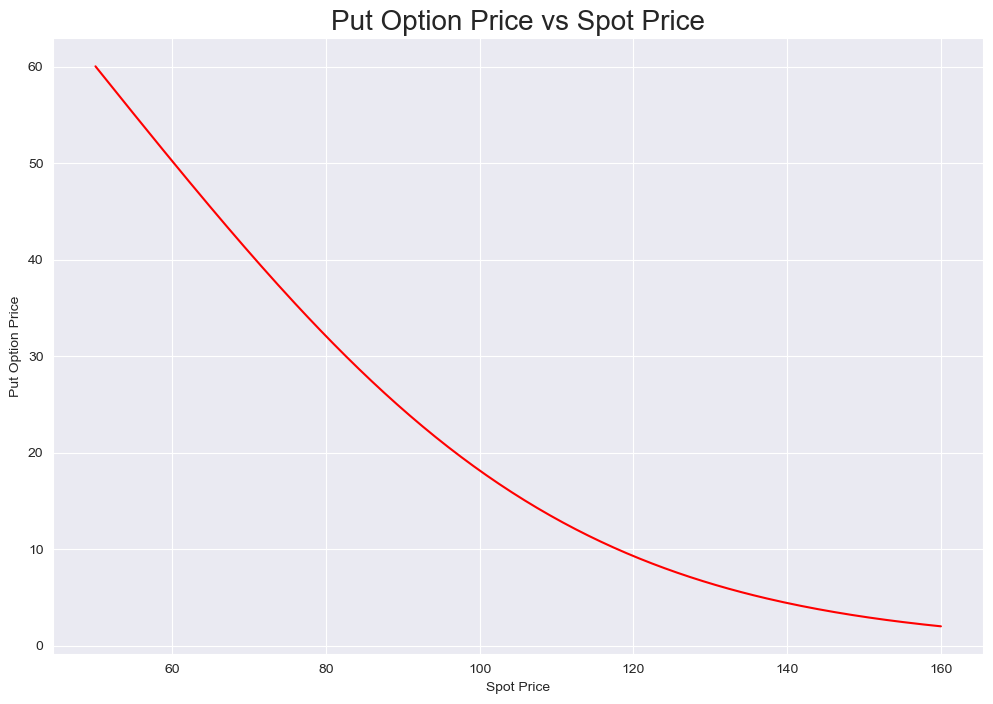

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm
import seaborn as sns
sns.set_style('darkgrid')

def bs_call(S0, K, sigma, t=1, r=0):
    """
    Description:
    
    Computes the Black-Scholes value of a European call option.
    
    Parameters:
        S0: Current asset price
        K: Strike price
        sigma: Yearly standard deviation of log-returns (volatility)
        t: Time to expiration (in years)
        r: Risk-free interest rate
    
    Returns:
        Call option price
    """
    d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))
    #d2 = (np.log(S0/K) + (r-.5*sigma**2)*t)/(sigma*np.sqrt(t))
    d2 = d1 - sigma*np.sqrt(t)
    return S0*norm.cdf(d1)-K*np.exp(-r*t)*norm.cdf(d2)


def bs_put(S0, K, sigma, t=1, r=0):
    """
    Description:
    
    Computes the Black-Scholes value of a European put option.
    
    Parameters:
        S0: Current asset price
        K: Strike price
        sigma: Yearly standard deviation of log-returns (volatility)
        t: Time to expiration (in years)
        r: Risk-free interest rate
    
    Returns:
        Put option price
    """
    
    d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))
    #d2 = (np.log(S0/K) + (r-.5*sigma**2)*t)/(sigma*np.sqrt(t))
    d2 = d1 - sigma*np.sqrt(t)
    return -S0*norm.cdf(-d1)+K*np.exp(-r*t)*norm.cdf(-d2)


S0 = 100
K = 110
sigma = .3
times = np.linspace(1/12, 5, 70)


call_prices = [bs_call(S0,K,sigma, t = times[i]) for i in range(len(times))]


plt.figure(figsize = (12,8))
plt.title('Changes Black-Scholes Call Option prices time to expiration', size = 25)
plt.plot(times, call_prices)
plt.xlabel('Time to Expiration')
plt.ylabel('Black-Scholes Call Price')
plt.show()

# b) Call Option Price vs Spot Price
spot_prices = np.linspace(50, 160, 200)
call_prices_spot = [bs_call(S, K, sigma, t=1) for S in spot_prices]

plt.figure(figsize=(12, 8))
plt.plot(spot_prices, call_prices_spot)
plt.title('Call Option Price vs Spot Price', fontsize=20)
plt.xlabel('Spot Price')
plt.ylabel('Call Option Price')
plt.grid(True)
plt.show()

# c) Put option price vs time to expiration and vs spot price
put_prices = [bs_put(S0, K, sigma, t=t) for t in times]

plt.figure(figsize=(12, 8))
plt.plot(times, put_prices, color='orange')
plt.title('Put Option Price vs Time to Expiration', fontsize=20)
plt.xlabel('Time to Expiration')
plt.ylabel('Put Option Price')
plt.grid(True)
plt.show()

put_prices_spot = [bs_put(S, K, sigma, t=1) for S in spot_prices]

plt.figure(figsize=(12, 8))
plt.plot(spot_prices, put_prices_spot, color='red')
plt.title('Put Option Price vs Spot Price', fontsize=20)
plt.xlabel('Spot Price')
plt.ylabel('Put Option Price')
plt.grid(True)
plt.show()
